## Regularization

### L2正則(重み減衰)をスクラッチ実装

In [53]:
import torch
from torch import nn
from torch.nn import functional as F
from torch import optim
import torchvision
from torchvision import models, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
X = torch.tensor([[1., 2., 3.], [4., 5., 6.]])
X

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [4]:
torch.linalg.norm(X)

tensor(9.5394)

In [5]:
torch.sqrt(torch.sum(X**2))

tensor(9.5394)

In [48]:
def get_conv_model(): 
    return nn.Sequential(
                # 3✖️28✖️28
                nn.Conv2d(3, 4, kernel_size = 3, stride = 2, padding = 1),
                nn.ReLU(),
                # 4✖️14✖️14
                nn.Conv2d(4, 8, kernel_size = 3, stride = 2, padding = 1),
                nn.ReLU(),
                # 8✖️7✖️7
                nn.Conv2d(8, 16, kernel_size = 3, stride = 2, padding = 1),
                nn.ReLU(),
                # 16✖️4✖️4
                nn.Conv2d(16, 32, kernel_size = 3, stride = 2, padding = 1),
                nn.ReLU(),
                # 32✖️2✖️2
                # nn.Flatten()
                # # 128
                # nn.Linear(128, 10)
                nn.Conv2d(32, 10, kernel_size = 3, stride = 2, padding = 1),
                # 10✖️1✖️1
                nn.Flatten()
                # 10
             )

In [17]:
l2_reg = torch.tensor(0.)
for name, params in conv_model.named_parameters():
    # print(name, params)
    if 'weight' in name:
        l2_reg = torch.linalg.norm(params)**2

# loss += (weight_decay / (2*m)) * l2_reg

### PytorchでのL2正則

In [19]:
optim.SGD(conv_model.parameters(), lr = 0.03, weight_decay = 0.01)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.03
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0.01
)

### L2正則の有無による精度比較

In [49]:
conv_model = get_conv_model()
conv_model_l2 = get_conv_model()

# データ準備
transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    # CIFAR10用
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
train_dataset = torchvision.datasets.CIFAR10('./cifar10_data', train=True, download=True, transform=transform)
val_dataset = torchvision.datasets.CIFAR10('./cifar10_data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=128, num_workers=4)

Files already downloaded and verified
Files already downloaded and verified


In [50]:
opt_reg = optim.SGD(conv_model_l2.parameters(), lr = 0.03, weight_decay = 0.001)
opt = optim.SGD(conv_model.parameters(), lr = 0.03)

train_losses, val_losses, val_accuracies = utils.learn(conv_model, train_loader, val_loader, opt, F.cross_entropy, num_epoch = 20)
train_losses_reg, val_losses_reg, val_accuracies_reg = utils.learn(conv_model_l2, train_loader, val_loader, opt_reg, F.cross_entropy, num_epoch = 20)

epoch: 0: train error: 2.242599175714166, validation error: 2.067428951021991, validation accuracy: 0.2489121835443038


epoch: 1: train error: 1.9713008275727177, validation error: 1.8578428799592996, validation accuracy: 0.3313884493670886


epoch: 2: train error: 1.782260543550067, validation error: 1.6999543754360344, validation accuracy: 0.3885482594936709


epoch: 3: train error: 1.6576265874116316, validation error: 1.618484312974954, validation accuracy: 0.4104034810126582


epoch: 4: train error: 1.5808824285521836, validation error: 1.5542507880850682, validation accuracy: 0.43819224683544306


epoch: 5: train error: 1.5225285169718517, validation error: 1.5069709457928622, validation accuracy: 0.45114715189873417


epoch: 6: train error: 1.4849965038811763, validation error: 1.4762638022628012, validation accuracy: 0.46410205696202533


epoch: 7: train error: 1.4557149282196904, validation error: 1.4646638254576092, validation accuracy: 0.47606803797468356


epoch: 8: train error: 1.4321350005581557, validation error: 1.43911807597438, validation accuracy: 0.4856606012658228


epoch: 9: train error: 1.4072352519730473, validation error: 1.3925614734239216, validation accuracy: 0.5052412974683544


epoch: 10: train error: 1.3929431828696404, validation error: 1.4216079470477527, validation accuracy: 0.4861550632911392


epoch: 11: train error: 1.3773782994131298, validation error: 1.3766941179203083, validation accuracy: 0.5052412974683544


epoch: 12: train error: 1.3654218369432727, validation error: 1.362701506554326, validation accuracy: 0.5100870253164557


epoch: 13: train error: 1.351781338377072, validation error: 1.3540275609945949, validation accuracy: 0.5162183544303798


epoch: 14: train error: 1.3383701411659454, validation error: 1.3851405020001568, validation accuracy: 0.5032634493670886


epoch: 15: train error: 1.327383041686719, validation error: 1.3373175829271726, validation accuracy: 0.5292721518987342


epoch: 16: train error: 1.3181370661386749, validation error: 1.352094037623345, validation accuracy: 0.5175039556962026


epoch: 17: train error: 1.3058549650489826, validation error: 1.319399442853807, validation accuracy: 0.5275909810126582


epoch: 18: train error: 1.2994918875072314, validation error: 1.3188719311846961, validation accuracy: 0.5222507911392406


epoch: 19: train error: 1.290113988434872, validation error: 1.3463992076584055, validation accuracy: 0.5168117088607594


epoch: 0: train error: 2.302441869550349, validation error: 2.3009248353257963, validation accuracy: 0.125


epoch: 1: train error: 2.2811239186455223, validation error: 2.153048998192896, validation accuracy: 0.22913370253164558


epoch: 2: train error: 2.025457719707733, validation error: 1.915088843695725, validation accuracy: 0.3068631329113924


epoch: 3: train error: 1.8475335330304588, validation error: 1.7779124733767933, validation accuracy: 0.353935917721519


epoch: 4: train error: 1.7160356142331876, validation error: 1.6472440097905412, validation accuracy: 0.4158425632911392


epoch: 5: train error: 1.6263514071169412, validation error: 1.5725872788248183, validation accuracy: 0.4397745253164557


epoch: 6: train error: 1.5588917427355675, validation error: 1.539472970781447, validation accuracy: 0.4464992088607595


epoch: 7: train error: 1.5096448803191904, validation error: 1.6058973466293722, validation accuracy: 0.41999604430379744


epoch: 8: train error: 1.4683955365129748, validation error: 1.4449123777920687, validation accuracy: 0.4814082278481013


epoch: 9: train error: 1.4325425350452627, validation error: 1.4523546288285074, validation accuracy: 0.47923259493670883


epoch: 10: train error: 1.409302120318498, validation error: 1.4083629016634784, validation accuracy: 0.4990110759493671


epoch: 11: train error: 1.3840268511906304, validation error: 1.386898185633406, validation accuracy: 0.5025712025316456


epoch: 12: train error: 1.3604310144243947, validation error: 1.4006000198895419, validation accuracy: 0.49861550632911394


epoch: 13: train error: 1.341850562168814, validation error: 1.3507716851898386, validation accuracy: 0.5181962025316456


epoch: 14: train error: 1.324271292027915, validation error: 1.3244684466832801, validation accuracy: 0.5286787974683544


epoch: 15: train error: 1.307388229138406, validation error: 1.3266716275034072, validation accuracy: 0.5277887658227848


epoch: 16: train error: 1.2925596688409595, validation error: 1.3527782597119296, validation accuracy: 0.5176028481012658


epoch: 17: train error: 1.2798085328563096, validation error: 1.3137994280344323, validation accuracy: 0.5347112341772152


epoch: 18: train error: 1.2700321448733434, validation error: 1.3160795833491072, validation accuracy: 0.5320411392405063


epoch: 19: train error: 1.258572086348863, validation error: 1.2680566099625599, validation accuracy: 0.5512262658227848


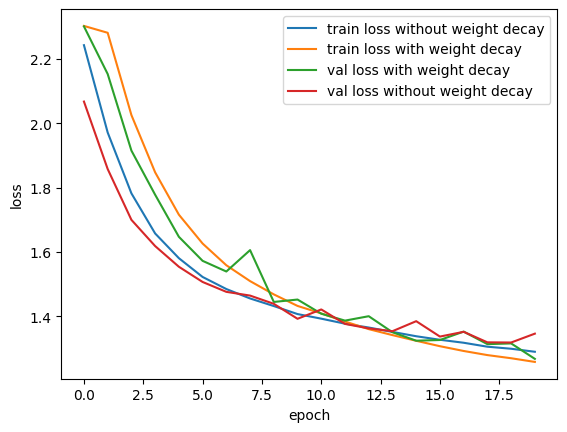

In [54]:
plt.plot(train_losses, label='train loss without weight decay')
plt.plot(train_losses_reg, label='train loss with weight decay')
plt.plot(val_losses_reg, label='val loss with weight decay')
plt.plot(val_losses, label='val loss without weight decay')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

## Dropout

### Dropoutをスクラッチ実装

In [55]:
def dropout(X, drop_p):
    keep_p = 1 - drop_p
    mask = torch.randn(X.shape) < keep_p
    return X * mask / keep_p

In [56]:
def relu(X):
    return torch.clamp(X, min = 0)

In [58]:
X = torch.randn(100, 100)
droped_X = dropout(X, 0.3)

In [59]:
droped_X

tensor([[-2.1210,  2.1616,  0.0000,  ..., -0.5795,  1.6862, -3.5816],
        [ 1.0150,  0.0867,  0.6299,  ..., -0.0000, -0.2220,  0.0000],
        [-2.1122, -1.1792,  3.1743,  ...,  0.4487,  2.9804,  1.1877],
        ...,
        [-0.0000, -1.2912,  0.0000,  ..., -0.3984,  1.0764, -0.4257],
        [-0.0000,  0.7890,  0.8053,  ...,  2.4697,  0.5553, -2.5767],
        [-0.1023, -0.0000, -2.1048,  ...,  0.4642, -0.0000, -0.0096]])

### PytorchでのDropout

In [61]:
model = nn.Sequential(
    nn.Linear(64, 20),
    nn.ReLU(),
    nn.Dropout(p = 0.4),
    nn.Linear(20, 10)
)

In [62]:
model

Sequential(
  (0): Linear(in_features=64, out_features=20, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.4, inplace=False)
  (3): Linear(in_features=20, out_features=10, bias=True)
)